# Name : Sahil Sahil
# Student Number : D17124269

Install the packages

In [1]:
# install.packages("reshape2")
# install.packages("GGally")
# install.packages("ggExtra")
# install.packages("ggalluvial")
# install.packages("plotly")
# install.packages("corrplot")
# install.packages("sqldf")
# install.packages("tm")
# install.packages("wordcloud")
# install.packages("tidyverse")
# install.packages("lubridate")
# install.packages("zoo")
# install.packages("ggplot2")
# install.packages("magrittr") # package installations are only needed the first time you use it
# install.packages("dplyr")
# install.packages("SnowballC") # for text stemming


Load the packages

In [2]:
library(tidyverse)
library(lubridate)
library(zoo)
library(ggplot2)
library(magrittr)
library(dplyr)
library(reshape2)
library(GGally)
library(ggExtra)
library(ggalluvial)
library(plotly)
library(corrplot)
library(sqldf)
library(tm)
library(wordcloud)
library(SnowballC)



Warning message:
"package 'tidyverse' was built under R version 4.0.5"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 4.0.5"
Warning message:
"package 'tibble' was built under R version 4.0.5"
Warning message:
"package 'tidyr' was built under R version 4.0.5"
Warning message:
"package 'dplyr' was built under R version 4.0.5"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'lubridate' was built under R version 4.0.5"

Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, un

In [3]:
# load in the dataset
dfsource<-"./data1/IMDb movies.csv"
imdbmovies <- read.csv(dfsource, stringsAsFactors = FALSE)

dfsource2<-"./data1/IMDb ratings.csv"
imdbratings <- read.csv(dfsource2, stringsAsFactors = FALSE)

In [4]:
colnames(imdbmovies)

[1] "imdb_title_id"         "title"                 "original_title"       
 [4] "year"                  "date_published"        "genre"                
 [7] "duration"              "country"               "language"             
[10] "director"              "writer"                "production_company"   
[13] "actors"                "description"           "avg_vote"             
[16] "votes"                 "budget"                "usa_gross_income"     
[19] "worlwide_gross_income" "metascore"             "reviews_from_users"   
[22] "reviews_from_critics"

Changed the coloumn headers as to look much more nicer and understandable

In [5]:
imdbmovies <- imdbmovies %>% 
  rename(
    ImdbTitleId = imdb_title_id,
    OriginalTitle = original_title,
    DatePublished = date_published,
    AvgVote = avg_vote,
    UsaGrossIncome = usa_gross_income,
    WorlWideGrossIncome = worlwide_gross_income,
    ReviewsFromUsers = reviews_from_users,
    ReviewsFromCritics = reviews_from_critics,
    Title = title,
    Year = year,
    Genre = genre,
    Duration = duration,
    Country = country,
    Language = language,
    Director = director,
    Actors = actors,
    Description = description,
    Votes = votes,
    Budget = budget,
    Metascore = metascore,
    )

In [6]:
head(imdbmovies)

,ImdbTitleId,Title,OriginalTitle,Year,DatePublished,Genre,Duration,Country,Language,Director,...,Actors,Description,AvgVote,Votes,Budget,UsaGrossIncome,WorlWideGrossIncome,Metascore,ReviewsFromUsers,ReviewsFromCritics
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey Depew",The adventures of a female reporter in the 1890s.,5.9,154,,,,NA,1,2
2,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Bella Cola, Will Coyne, Sam Crewes, Jack Ennis, John Forde, Vera Linden, Mr. Marshall, Mr. McKenzie, Frank Mills, Ollie Wilson",True story of notorious Australian outlaw Ned Kelly (1855-80).,6.1,589,$ 2250,,,NA,7,7
3,tt0001892,Den sorte drÃ¸m,Den sorte drÃ¸m,1911,1911-08-19,Drama,53,"Germany, Denmark",,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helsengreen, Emil Albes, Hugo Flink, Mary Hagen","Two men of high rank are both wooing the beautiful and famous equestrian acrobat Stella. While Stella ignores the jeweler Hirsch, she accepts Count von Waldberg's offer to follow her home, ...",5.8,188,,,,NA,5,2
4,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, Miss Robson, Helene Costello, Charles Sindelar, Mr. Howard, James R. Waite, Mr. Osborne, Harry Knowles, Mr. Paul, Mr. Brady, Mr. Corker",The fabled queen of Egypt's affair with Roman general Marc Antony is ultimately disastrous for both of them.,5.2,446,$ 45000,,,NA,25,3
5,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de Liguoro, Pier Delle Vigne, Augusto Milla, Attilio Motta, Emilise Beretta",Loosely adapted from Dante's Divine Comedy and inspired by the illustrations of Gustav DorÃ© the original silent film has been restored and has a new score by Tangerine Dream.,7.0,2237,,,,NA,31,14
6,tt0002199,"From the Manger to the Cross; or, Jesus of Nazareth","From the Manger to the Cross; or, Jesus of Nazareth",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier, Alice Hollister, Samuel Morgan, James D. Ainsley, Robert G. Vignola, George Kellog, J.P. McGowan","An account of the life of Jesus Christ, based on the books of the New Testament: After Jesus' birth is foretold to his parents, he is born in Bethlehem, and is visited by shepherds and wise...",5.7,484,,,,NA,13,5


### DROP columns which contains too much missing values

In [7]:
# first of all check the dimension
dim(imdbmovies)

[1] 85855    22

In [8]:
# removed those 3 columns as they didnt had much useful stuff and also was empty in most of their cells
imdbmovies <- subset (imdbmovies, select = -Metascore)
imdbmovies <- subset (imdbmovies, select = -UsaGrossIncome)
imdbmovies <- subset (imdbmovies, select = -WorlWideGrossIncome)
imdbmovies <- subset (imdbmovies, select = -production_company)
imdbmovies <- subset (imdbmovies, select = -Budget)

### Fix the missing values in the dataset

In [9]:
# number of empty cells in all of the columns
# is.na(imdbmovies)
sum(is.na(imdbmovies))

[1] 19394

In [10]:
#  it returns the list of data which have missing values in it
imdbmovies[!complete.cases(imdbmovies),]

,ImdbTitleId,Title,OriginalTitle,Year,DatePublished,Genre,Duration,Country,Language,Director,writer,Actors,Description,AvgVote,Votes,ReviewsFromUsers,ReviewsFromCritics
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
15,tt0003102,Ma l'amor mio non muore...,Ma l'amor mio non muore...,1914,1914-01-01,Drama,90,Italy,Italian,Mario Caserini,"Emiliano Bonetti, G. Monleone","Lyda Borelli, Mario Bonnard, Gian Paolo Rosmino, Vittorio Rossi Pianelli, Dante Cappelli, Maria Caserini, Camillo De Riso, Emilio Petacci, Antonio Monti, Letizia Quaranta, Felice Metellio, Gentile Miotti","Leslie Swayne, an adventurer, in order to obtain enough money to satisfy the needs of his extravagant life, has been bribed to steal the plans of the fortification from the staff officers ...",6.2,100,NA,4
18,tt0003167,Amore di madre,"Home, Sweet Home",1914,1914-05-17,Drama,55,USA,English,D.W. Griffith,"D.W. Griffith, H.E. Aitken","Henry B. Walthall, Josephine Crowell, Lillian Gish, Dorothy Gish, Fay Tincher, Mae Marsh, Spottiswoode Aitken, Robert Harron, Miriam Cooper, Mary Alden, Donald Crisp, James Kirkwood, Jack Pickford, Fred Burns, Courtenay Foote","John Howard Payne at his most miserable point in life, writes a song which becomes popular and inspires other people at some point in their lives.",5.8,187,6,NA
30,tt0004026,Der Golem,Der Golem,1915,1915-04-08,Horror,60,Germany,German,"Henrik Galeen, Paul Wegener","Henrik Galeen, Paul Wegener","Paul Wegener, Henrik Galeen, Lyda Salmonova, Rudolf BlÃ¼mner, Robert A. Dietrich, Carl Ebert, Jakob Tiedtke","In this version of the golem legend, the golem, a clay statue brought to life by Rabbi Loew in 16th century Prague to save the Jews from the ongoing brutal persecution by the city's rulers,...",6.8,1040,5,NA
42,tt0004743,Uncle Tom's Cabin,Uncle Tom's Cabin,1914,1914-08-10,Drama,54,USA,,William Robert Daly,"Harriet Beecher Stowe, George L. Aiken","Sam Lucas, Walter Hitchcock, Hattie Delaro, Master Abernathy, Teresa Michelena, Irving Cummings, Paul Scardon, Marie Eline, Garfield Thompson, Roy Applegate, Boots Wall",A black and white silent film based on Harriet Beecher Stowe's novel documenting the life and times of Uncle Tom.,5.3,112,4,NA
43,tt0004766,The Virginian,The Virginian,1914,1914-09-07,Western,55,USA,English,Cecil B. DeMille,"Owen Wister, Kirk La Shelle","Dustin Farnum, Jack W. Johnston, Sydney Deane, William Elmer, Winifred Kingston, James Griswold, Horace B. Carpenter, Tex Driscoll","A good-natured but chivalrous cowboy romances the local schoolmarm and leads the posse that brings a gang of rustlers, which includes his best friend, to justice.",5.6,174,12,NA
58,tt0005809,The Nigger,The Nigger,1915,1915-03-29,Drama,50,USA,English,Edgar Lewis,"Edgar Lewis, Edward Sheldon","William Farnum, Claire Whitney, George De Carlton, Henry Armetta","Philip Morrow grows to manhood in the belief that the blood in his veins is the most aristocratic in the South. ""Clif"" Noyes, a distiller of whiskey of the fiery brand manufactured for ...",6.1,300,NA,NA
65,tt0006509,The Children in the House,The Children in the House,1916,1916-04-30,Drama,50,USA,English,"Chester M. Franklin, Sidney Franklin",Roy Somerville,"Norma Talmadge, Alice Wilson, Jewel Carmen, William Hinckley, W.E. Lawrence, George C. Pearce, Eugene Pallette, Walter Long, Alva D. Blake, Georgie Stone, Violet Radcliffe, 'Baby' Carmen De Rue, Francis Carpenter, Ninon Fovieri",Roy Somerville has turned out a rather interesting story that will hold the interest of the majority of audiences as produced by the Triangle-Fine Arts Company. It is a five-reel feature ...,4.5,559,5,NA
68,tt0006617,DÃ¶dskyssen,DÃ¶dskyssen,1916,1916-08-25,"Comedy, Crime, Drama",60,Sweden,,Victor SjÃ¶strÃ¶m,"A.V. SamsjÃ¶, Sam Ask","Victor SjÃ¶strÃ¶m, Albin LavÃ©n, Mathias Taube, Wanda Rothgardt, Jenny Tschernichin-Larsson",Dr Monro is found dead in his home. Three people are testifying before the police about what happened.,6.1,199,NA,

In [11]:
# this function deletes the cell with empty values in it
imdbmovies <- na.omit(imdbmovies)

In [12]:
# check how many cells are still empty
sum(is.na(imdbmovies))

[1] 0

## Change the 'Year' and 'budget' column from charater to number 

In [13]:
# changing the variable types <chr> to <date> format
imdbmovies$DatePublished<-ymd(imdbmovies$DatePublished)

Warning message:
" 2761 failed to parse."


In [14]:
imdbmovies$Year <- factor(imdbmovies$Year)

### Removal of "None" from the 'Language' columns as this can affect in future visualisations.

In [15]:
# removed
imdbmovies$Language <- (sapply(imdbmovies$Language,gsub,pattern="\\None",replacement=""))

In [16]:
# used to check if there are any duplicate columns in the dataset
# FALSE represent that there are not a single cell which consists of any duplicate cell.
duplicated(imdbmovies)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [6

In [17]:
summary(imdbmovies)

 ImdbTitleId           Title           OriginalTitle           Year      
 Length:69968       Length:69968       Length:69968       2017   : 2640  
 Class :character   Class :character   Class :character   2018   : 2608  
 Mode  :character   Mode  :character   Mode  :character   2016   : 2456  
                                                          2014   : 2337  
                                                          2015   : 2337  
                                                          2013   : 2264  
                                                          (Other):55326  
 DatePublished           Genre              Duration        Country         
 Min.   :1894-10-09   Length:69968       Min.   : 41.00   Length:69968      
 1st Qu.:1978-06-14   Class :character   1st Qu.: 88.00   Class :character  
 Median :2003-10-24   Mode  :character   Median : 96.00   Mode  :character  
 Mean   :1993-12-11                      Mean   : 99.85                     
 3rd Qu.:2013-07-30    

In [18]:
# this function deletes the cell with empty values in it
imdbmovies <- na.omit(imdbmovies)

In [19]:
colnames(imdbratings)

[1] "imdb_title_id"             "weighted_average_vote"    
 [3] "total_votes"               "mean_vote"                
 [5] "median_vote"               "votes_10"                 
 [7] "votes_9"                   "votes_8"                  
 [9] "votes_7"                   "votes_6"                  
[11] "votes_5"                   "votes_4"                  
[13] "votes_3"                   "votes_2"                  
[15] "votes_1"                   "allgenders_0age_avg_vote" 
[17] "allgenders_0age_votes"     "allgenders_18age_avg_vote"
[19] "allgenders_18age_votes"    "allgenders_30age_avg_vote"
[21] "allgenders_30age_votes"    "allgenders_45age_avg_vote"
[23] "allgenders_45age_votes"    "males_allages_avg_vote"   
[25] "males_allages_votes"       "males_0age_avg_vote"      
[27] "males_0age_votes"          "males_18age_avg_vote"     
[29] "males_18age_votes"         "males_30age_avg_vote"     
[31] "males_30age_votes"         "males_45age_avg_vote"     
[33] "males_45age_votes"         "females_allages_avg_vote" 
[35] "females_allages_votes"     "females_0age_avg_vote"    
[37] "females_0age_votes"        "females_18age_avg_vote"   
[39] "females_18age_votes"       "females_30age_avg_vote"   
[41] "females_30age_votes"       "females_45age_avg_vote"   
[43] "females_45age_votes"       "top1000_voters_rating"    
[45] "top1000_voters_votes"      "us_voters_rating"         
[47] "us_voters_votes"           "non_us_voters_rating"     
[49] "non_us_voters_votes"

In [20]:
# Changed the coloumn headers as to look much more nicer and understandable
imdbratings <- imdbratings %>% 
  rename(
    ImdbTitleId = imdb_title_id,
    WeightedAverageVote = weighted_average_vote,
    TotalVotes = total_votes,
    MeanVote = mean_vote,
    MedianVote = median_vote,
    AvgNonUSVoters = non_us_voters_rating,
    AvgUSVotes = us_voters_votes,
    )

In [21]:
# first of all check the dimension
dim(imdbratings)

[1] 85855    49

In [22]:
# removed those 3 columns as they didnt had much useful stuff and also was empty in most of their cells
imdbratings <- subset (imdbratings, select = -votes_10)
imdbratings <- subset (imdbratings, select = -votes_9)
imdbratings <- subset (imdbratings, select = -votes_8)
imdbratings <- subset (imdbratings, select = -votes_7)
imdbratings <- subset (imdbratings, select = -votes_6)
imdbratings <- subset (imdbratings, select = -votes_5)
imdbratings <- subset (imdbratings, select = -votes_4)
imdbratings <- subset (imdbratings, select = -votes_3)
imdbratings <- subset (imdbratings, select = -votes_2)
imdbratings <- subset (imdbratings, select = -votes_1)
imdbratings <- subset (imdbratings, select = -allgenders_0age_avg_vote)
imdbratings <- subset (imdbratings, select = -allgenders_0age_votes)
imdbratings <- subset (imdbratings, select = -allgenders_18age_avg_vote)
imdbratings <- subset (imdbratings, select = -allgenders_18age_votes)
imdbratings <- subset (imdbratings, select = -allgenders_30age_avg_vote)
imdbratings <- subset (imdbratings, select = -allgenders_30age_votes)
imdbratings <- subset (imdbratings, select = -allgenders_45age_avg_vote)
imdbratings <- subset (imdbratings, select = -allgenders_45age_votes)
imdbratings <- subset (imdbratings, select = -males_allages_avg_vote)
imdbratings <- subset (imdbratings, select = -males_allages_votes)

imdbratings <- subset (imdbratings, select = -females_allages_votes)
imdbratings <- subset (imdbratings, select = -females_0age_avg_vote)
imdbratings <- subset (imdbratings, select = -females_0age_votes)
imdbratings <- subset (imdbratings, select = -females_18age_avg_vote)
imdbratings <- subset (imdbratings, select = -females_18age_votes)
imdbratings <- subset (imdbratings, select = -females_30age_avg_vote)
imdbratings <- subset (imdbratings, select = -females_45age_votes)
imdbratings <- subset (imdbratings, select = -females_45age_avg_vote)
imdbratings <- subset (imdbratings, select = -females_30age_votes)
imdbratings <- subset (imdbratings, select = -top1000_voters_rating)
imdbratings <- subset (imdbratings, select = -top1000_voters_votes)
imdbratings <- subset (imdbratings, select = -us_voters_rating)

In [23]:
# removed more columns from imdbratings
imdbratings <- subset (imdbratings, select = -males_0age_avg_vote)
imdbratings <- subset (imdbratings, select = -males_0age_votes)
imdbratings <- subset (imdbratings, select = -males_18age_avg_vote)
imdbratings <- subset (imdbratings, select = -males_30age_votes)
imdbratings <- subset (imdbratings, select = -males_30age_avg_vote)
imdbratings <- subset (imdbratings, select = -males_18age_votes)
imdbratings <- subset (imdbratings, select = -males_45age_avg_vote)
imdbratings <- subset (imdbratings, select = -males_45age_votes)
imdbratings <- subset (imdbratings, select = -females_allages_avg_vote)
imdbratings <- subset (imdbratings, select = -non_us_voters_votes)

In [24]:
colnames(imdbratings)

[1] "ImdbTitleId"         "WeightedAverageVote" "TotalVotes"         
[4] "MeanVote"            "MedianVote"          "AvgUSVotes"         
[7] "AvgNonUSVoters"

In [25]:
# Fix the missing values in the dataset
# number of empty cells in all of the columns
sum(is.na(imdbratings))

[1] 210

In [26]:
imdbratings <- na.omit(imdbratings)

In [27]:
sum(is.na(imdbratings))

[1] 0

So, no missing values in imdbratings file ^^

In [28]:
summary(imdbratings)

 ImdbTitleId        WeightedAverageVote   TotalVotes         MeanVote    
 Length:85645       Min.   :1.0         Min.   :     99   Min.   :1.000  
 Class :character   1st Qu.:5.2         1st Qu.:    205   1st Qu.:5.600  
 Mode  :character   Median :6.1         Median :    487   Median :6.400  
                    Mean   :5.9         Mean   :   9516   Mean   :6.227  
                    3rd Qu.:6.8         3rd Qu.:   1773   3rd Qu.:7.000  
                    Max.   :9.9         Max.   :2278845   Max.   :9.800  
   MedianVote       AvgUSVotes     AvgNonUSVoters  
 Min.   : 1.000   Min.   :     1   Min.   : 1.000  
 1st Qu.: 6.000   1st Qu.:    24   1st Qu.: 5.000  
 Median : 6.000   Median :    81   Median : 6.000  
 Mean   : 6.268   Mean   :  1648   Mean   : 5.751  
 3rd Qu.: 7.000   3rd Qu.:   335   3rd Qu.: 6.700  
 Max.   :10.000   Max.   :348363   Max.   :10.000  

In [29]:
head(imdbratings)

,ImdbTitleId,WeightedAverageVote,TotalVotes,MeanVote,MedianVote,AvgUSVotes,AvgNonUSVoters
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,tt0000009,5.9,154,5.9,6,51,6.0
2,tt0000574,6.1,589,6.3,6,96,6.2
3,tt0001892,5.8,188,6.0,6,31,5.9
4,tt0002101,5.2,446,5.3,5,207,4.7
5,tt0002130,7.0,2237,6.9,7,488,7.0
6,tt0002199,5.7,484,5.8,6,173,5.6


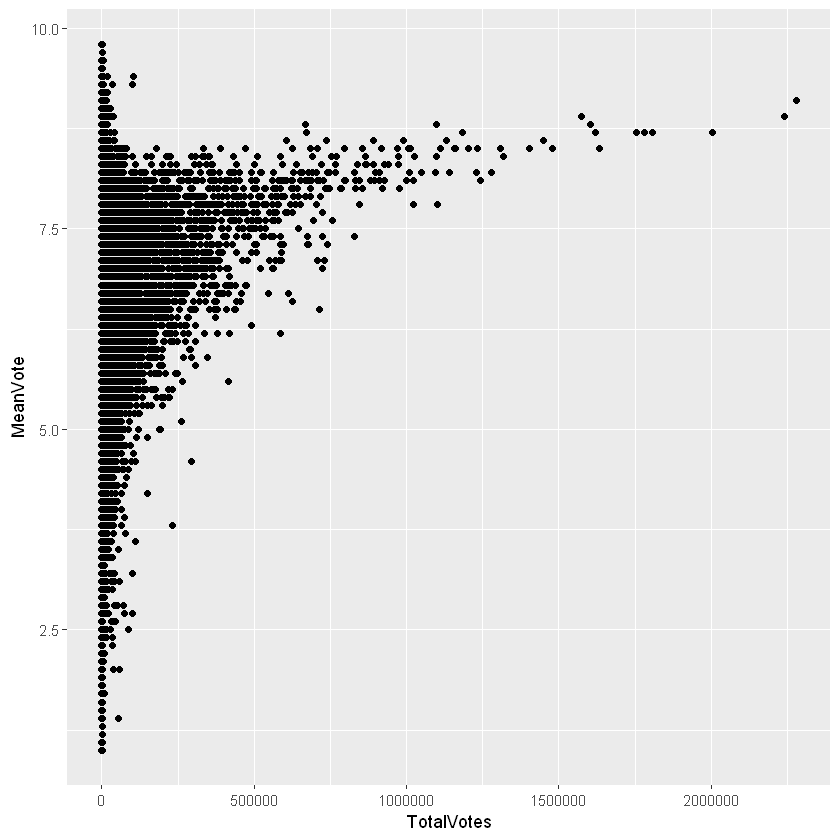

In [30]:
# check to see how number of TotalVotes relates to the MeanVote
ggplot(imdbratings, aes(x = TotalVotes, y = MeanVote)) +
  geom_point() 


As we can see from the scatter plot above, most of the movies are clusterd around a low number of reviews and are recieing mean vote between 5 - 8. So in conclusion from the plot is movies with high number of total votes are highly rated.

### Fixing the genre column in imdbmovies

Separating out the cells with multiple string in them and finally making them unique as better visualisation

In [31]:
newgenre <- do.call("rbind", strsplit(as.character(imdbmovies$Genre), ",", fixed = TRUE))


Warning message in rbind("Romance", c("Biography", " Crime", " Drama"), "Drama", :
"number of columns of result is not a multiple of vector length (arg 4)"


In [32]:
imdbmovies$newgenre <- sapply(strsplit(as.character(imdbmovies$Genre), ","),"[", 1)

In [33]:
s = unique(imdbmovies$newgenre)

In [34]:
s

[1] "Romance"     "Biography"   "Drama"       "Adventure"   "History"    
 [6] "Crime"       "Western"     "Fantasy"     "Comedy"      "Family"     
[11] "Action"      "Mystery"     "Horror"      "Sci-Fi"      "Musical"    
[16] "Music"       "Thriller"    "Animation"   "War"         "Film-Noir"  
[21] "Adult"       "Documentary" "Sport"

### This point graph displays the reviews from users vs reviews from critics


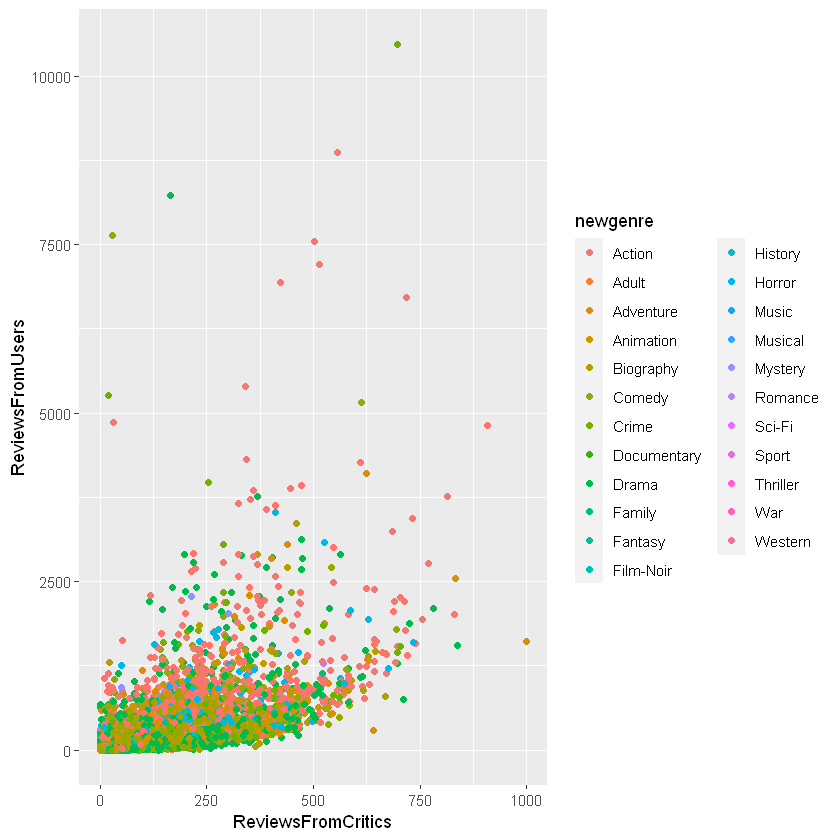

In [35]:
ggplot(data = imdbmovies, aes(x = ReviewsFromCritics, y = ReviewsFromUsers, colour=newgenre))+
    geom_point()

### Fixing the Country Column

Separating out the cells with multiple string in them and finally making them unique as better visualisation

In [36]:
newcountry <- do.call("rbind", strsplit(as.character(imdbmovies$Country), ",", fixed = TRUE))

Warning message in rbind("USA", "Australia", c("Germany", " Denmark"), "USA", "Italy", :
"number of columns of result is not a multiple of vector length (arg 3)"


In [37]:
imdbmovies$newcountry <- sapply(strsplit(as.character(imdbmovies$Country), ","),"[", 1)

In [38]:
c = unique(imdbmovies$newcountry)

In [39]:
c

[1] "USA"                              "Australia"                       
  [3] "Germany"                          "Italy"                           
  [5] "Romania"                          "France"                          
  [7] "Denmark"                          "Sweden"                          
  [9] "Belgium"                          "Hungary"                         
 [11] "Russia"                           "Mexico"                          
 [13] "Norway"                           "Japan"                           
 [15] "UK"                               "Soviet Union"                    
 [17] "Austria"                          "Chile"                           
 [19] "India"                            "China"                           
 [21] "Czechoslovakia"                   "Brazil"                          
 [23] "Canada"                           "Portugal"                        
 [25] "Spain"                            "Poland"                          
 [27] "Finland"                          "Switzerland"                     
 [29] "Argentina"                        "East Germany"                    
 [31] "Yugoslavia"                       "West Germany"                    
 [33] "Greece"                           "Egypt"                           
 [35] "Cuba"                             "Ireland"                         
 [37] "Netherlands"                      "Philippines"                     
 [39] "South Korea"                      "Hong Kong"                       
 [41] "Puerto Rico"                      "Bulgaria"                        
 [43] "Algeria"                          "Sri Lanka"                       
 [45] "South Africa"                     "Taiwan"                          
 [47] "Turkey"                           "Liechtenstein"                   
 [49] "Iran"                             "Bolivia"                         
 [51] "Israel"                           "Senegal"                         
 [53] "Syria"                            "Angola"                          
 [55] "Jamaica"                          "Ethiopia"                        
 [57] "Indonesia"                        "Lebanon"                         
 [59] "CÃ´te d'Ivoire"                   "Suriname"                        
 [61] "New Zealand"                      "Vietnam"                         
 [63] "Libya"                            "Zambia"                          
 [65] "Bahamas"                          "Colombia"                        
 [67] "Peru"                             "Tunisia"                         
 [69] "Iceland"                          "Venezuela"                       
 [71] "North Korea"                      "Burkina Faso"                    
 [73] "Gibraltar"                        "Armenia"                         
 [75] "Federal Republic of Yugoslavia"   "Slovakia"                        
 [77] "Estonia"                          "Czech Republic"                  
 [79] "Cambodia"                         "Republic of North Macedonia"     
 [81] "Singapore"                        "Kazakhstan"                      
 [83] "Croatia"                          "Mali"                            
 [85] "Dominican Republic"               "Slovenia"                        
 [87] "Bosnia and Herzegovina"           "Lithuania"                       
 [89] "Guinea"                           "Aruba"                           
 [91] "Kuwait"                           "Thailand"                        
 [93] "Greenland"                        "Kyrgyzstan"                      
 [95] "Tajikistan"                       "Luxembourg"                      
 [97] "Latvia"                           "Bangladesh"                      
 [99] "Bhutan"                           "Pakistan"                        
[101] "Mozambique"                       "Morocco"                         
[103] "Uruguay"                          "Ukraine"                         
[105] "Iraq"                             "Palestin

In [40]:
imdbmovies <- na.omit(imdbmovies)

## Individual Variables

As we can see there's interesting increasing pattern on movies year published.


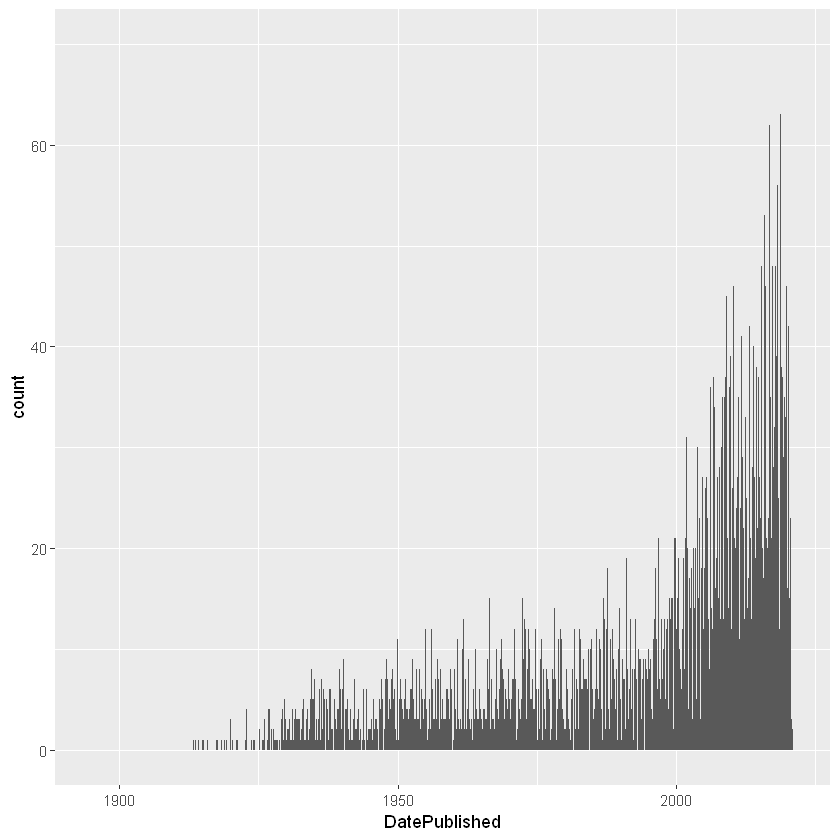

In [41]:
ggplot(data=imdbmovies,aes(x = DatePublished))+
  geom_histogram(binwidth=5)


In [42]:
imdbmovies <- na.omit(imdbmovies)

## 1 - Find Review from users for top 10 Countries

In [43]:
# Country analysis
# list top 10 countries which produces movies

top10 <- imdbmovies %>%
    group_by(newcountry) %>%
    summarize(count = n()) %>%
    top_n(10) %>%
    arrange(desc(count))
top10

Selecting by count



newcountry,count
<chr>,<int>
USA,27582
UK,5298
France,4370
India,3775
Italy,2836
Japan,2731
Canada,2127
Germany,1792
Hong Kong,1351


In [44]:
Countries <- imdbmovies %>%
    select(newcountry, ReviewsFromCritics, ReviewsFromUsers) %>%
    filter(newcountry %in% top10$newcountry)

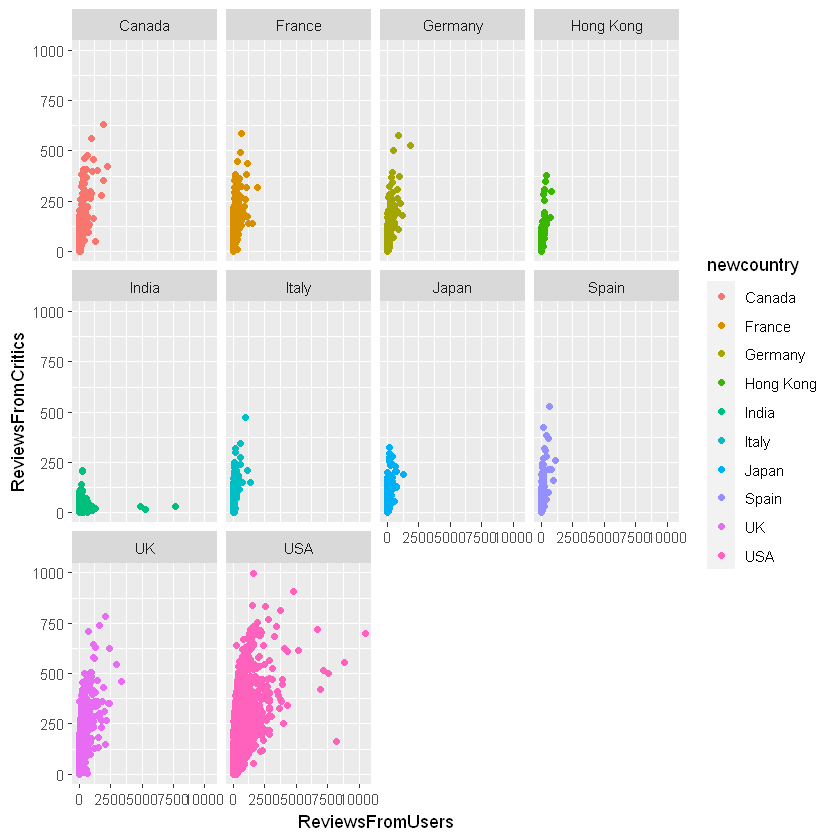

In [45]:
# scatter plot for displaying all of the movies.
ggplot(data = Countries, mapping = aes(x = ReviewsFromUsers, y = ReviewsFromCritics)) +
    geom_point(aes(colour = newcountry))+
    facet_wrap(~ newcountry)

As we can see from the diagrams up there, USA and UK have the highest number of movies produced and also they both have low and high user reviewed of movies.

## 2 -  Find Top Movie Genres

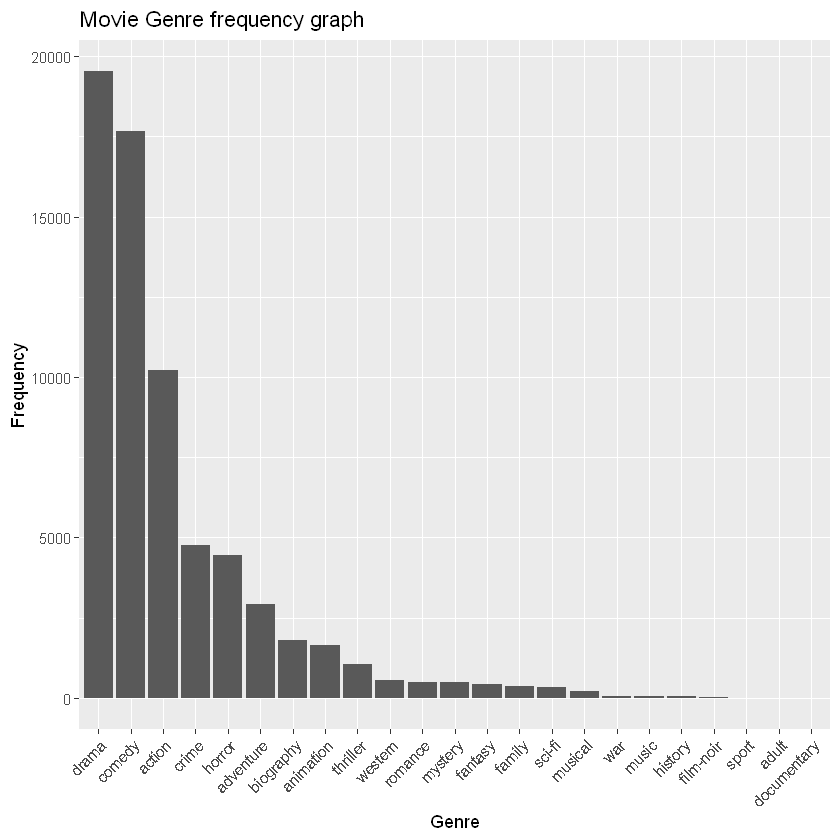

In [46]:
genre = Corpus(VectorSource(imdbmovies$newgenre))
dtm <- DocumentTermMatrix(genre)
m <- as.matrix(dtm)
v <- sort(colSums(m),decreasing=TRUE)
d <- data.frame(word = names(v), freq=v)

ggplot(d, aes(x=reorder(word,-v), y=v))+ 
  geom_bar(stat="identity")+
  theme(axis.text.x=element_text(angle=45, hjust=1))+
  ggtitle("Movie Genre frequency graph")+ 
  xlab("Genre")+
  ylab("Frequency")

So, as we can see on the graph. Drama, Comedy and Action are the three  top movie genres.

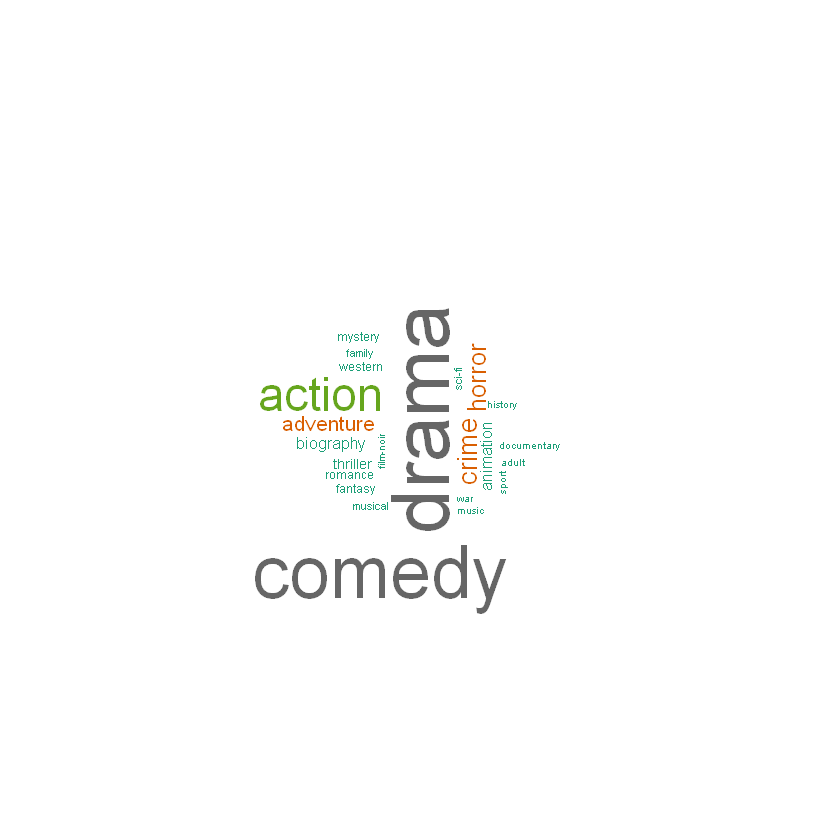

In [47]:
# cloud representation of generes analysis.
set.seed(1234)

wordcloud(words = d$word, freq = d$freq, min.freq = 1,
          max.words=100, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

The above word cloud clearly shows that Comedy, Drama and Action are the top most genres in the dataset.

## 3 - Top 25 Directors with most of the movies created

In [48]:
# removing more than 1 character in a single cell from each of them so that they will only have one character in each cell.
# also creating a new column in dataframe
NewDirectors <- do.call("rbind", strsplit(as.character(imdbmovies$Director), ",", fixed = TRUE))
imdbmovies$NewDirectors <- sapply(strsplit(as.character(imdbmovies$Director), ","),"[", 1)
d = unique(imdbmovies$NewDirectors)

In [49]:
colnames(imdbmovies)

[1] "ImdbTitleId"        "Title"              "OriginalTitle"     
 [4] "Year"               "DatePublished"      "Genre"             
 [7] "Duration"           "Country"            "Language"          
[10] "Director"           "writer"             "Actors"            
[13] "Description"        "AvgVote"            "Votes"             
[16] "ReviewsFromUsers"   "ReviewsFromCritics" "newgenre"          
[19] "newcountry"         "NewDirectors"

In [50]:
# deleting any empty cells again.
imdbmovies <- na.omit(imdbmovies)
sum(is.na(imdbmovies))

[1] 0

Selecting by Count



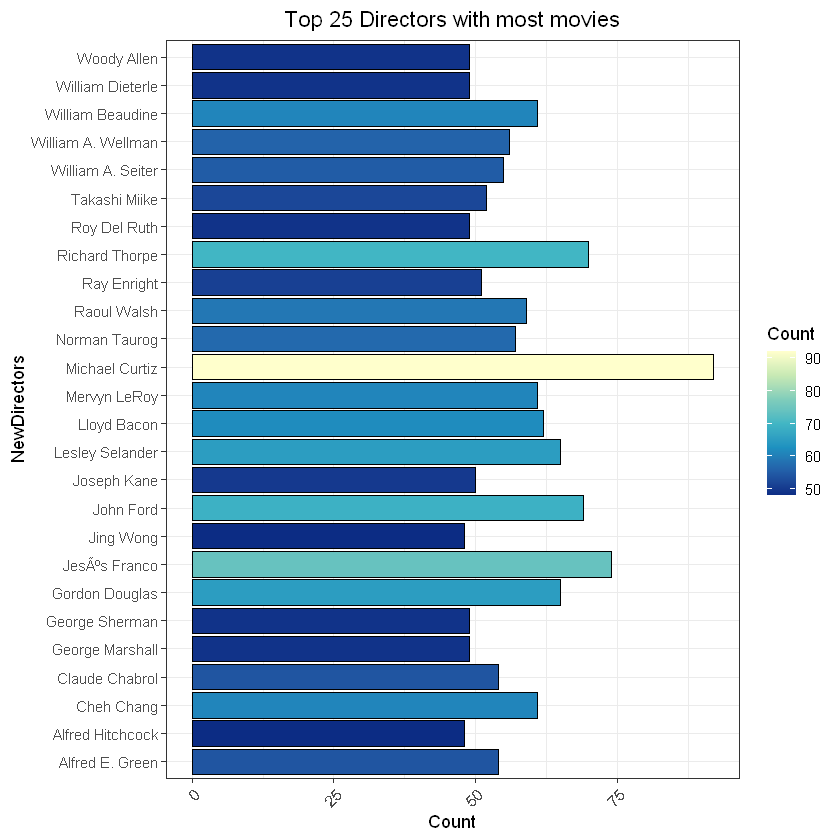

In [51]:
imdbmovies1 = filter(imdbmovies, !is.na(NewDirectors))
top_Directors = imdbmovies %>% group_by(NewDirectors) %>% 
                summarise(Count = n()) %>% 
                arrange(desc(Count)) %>% top_n(25)

ggplot(data=top_Directors,aes(x=NewDirectors,y=Count,fill=Count)) + 
geom_bar(colour='black',stat='identity') + 
theme_bw()+
ggtitle('Top 25 Directors with most movies') +
theme(axis.text.x = element_text(angle=45,hjust=1),
      plot.title = element_text(hjust=0.5)) + 
scale_fill_distiller(palette = 'YlGnBu')+
coord_flip()

## 4 -  Top 5 most spoken language movies
In simple use either imdbratings or imdbnames with imdbmovies

In [52]:
imdbmovies1 = filter(imdbmovies, !is.na(Language))
top5 <- imdbmovies %>%
    group_by(Language) %>%
    summarize(count = n()) %>%
    top_n(5) %>%
    arrange(desc(count))
top5

Selecting by count



Language,count
<chr>,<int>
English,31665
French,3095
Japanese,2319
Italian,1921
Spanish,1879


Selecting by Count



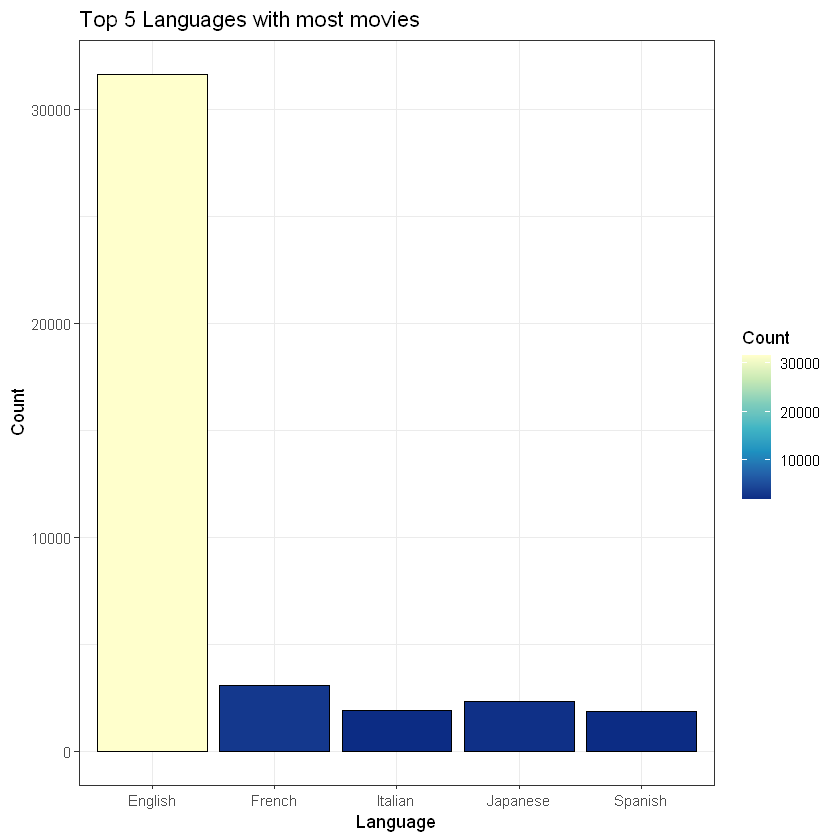

In [53]:
languages <- imdbmovies %>% group_by(Language) %>% 
    summarise(Count = n()) %>% 
    arrange(desc(Count)) %>% top_n(5)
ggplot(data=languages,aes(x=Language,y=Count,fill=Count)) + 
geom_bar(colour='black',stat='identity') + 
theme_bw()+
ggtitle('Top 5 Languages with most movies') +
scale_fill_distiller(palette = 'YlGnBu')